# Edge Detection Deep Dive

Firstly we will start with importing image



In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os 

In [6]:
cwd = os.getcwd()
img_path = os.path.join(cwd, 'images', 'exampleimage.jpg')
img = cv.imread(img_path)

In [13]:
def matplotlib_imshow(title, image, cmap_type='gray'):
    """Helper function to display an image using matplotlib."""
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()

def scale_by_factor(image, scale_factor, interpolation=cv.INTER_LINEAR):
    """Resize the image by a given scale factor."""
    width = int(image.shape[1] * scale_factor)
    height = int(image.shape[0] * scale_factor)
    dimensions = (width, height)
    return cv.resize(image, dimensions, interpolation=interpolation)

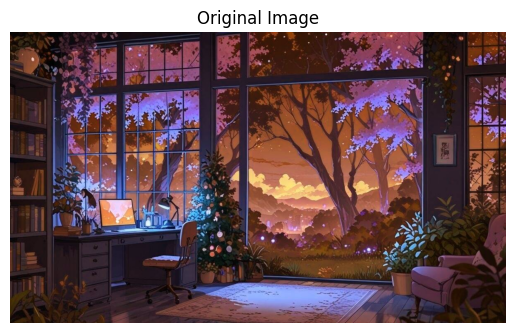

In [14]:
matplotlib_imshow('Original Image', img)

Now we can display our image

## First order methods for edge detection


### 1. Sobel edge detection

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-796.0..831.0].


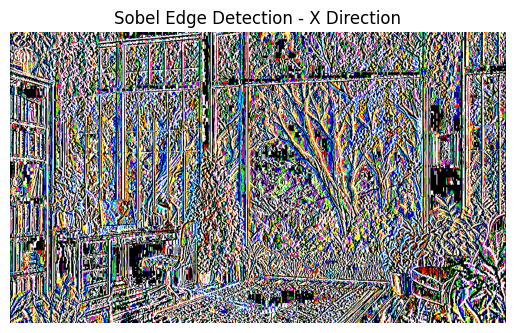

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-751.0..877.0].


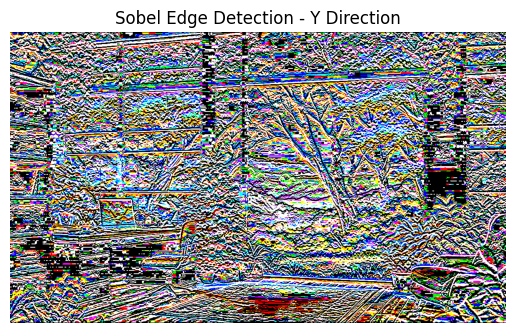

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..877.0142530198697].


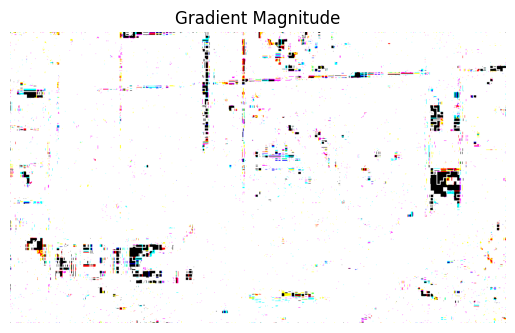

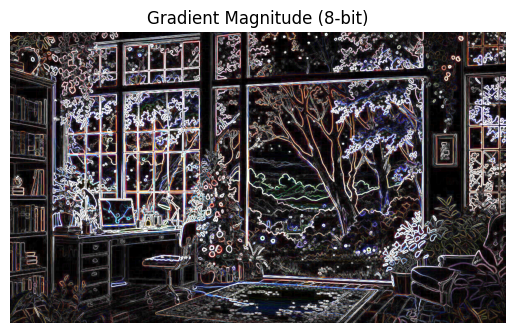

In [21]:
sobel_x = cv.Sobel(img, cv.CV_64F, 1, 0, ksize=3)
matplotlib_imshow('Sobel Edge Detection - X Direction', sobel_x)
sobel_y = cv.Sobel(img, cv.CV_64F, 0, 1, ksize=3)
matplotlib_imshow('Sobel Edge Detection - Y Direction', sobel_y)

gradient_magnitude = cv.magnitude(sobel_x, sobel_y)
matplotlib_imshow('Gradient Magnitude', gradient_magnitude)

gradient_magnitude = cv.convertScaleAbs(gradient_magnitude)
matplotlib_imshow('Gradient Magnitude (8-bit)', gradient_magnitude)
 

## Second order edge detection

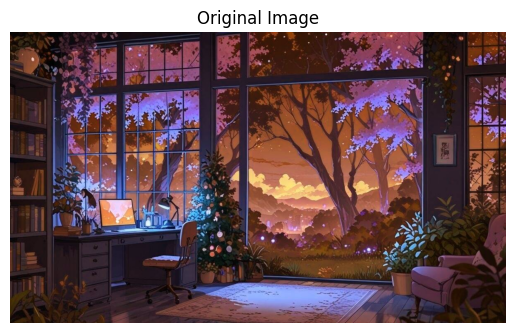

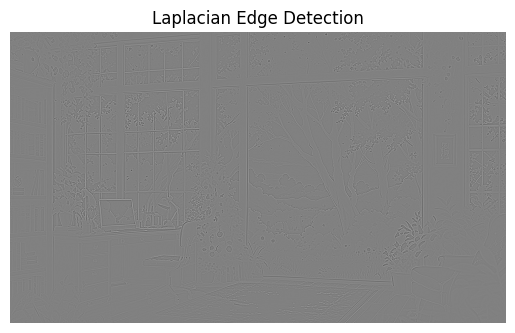

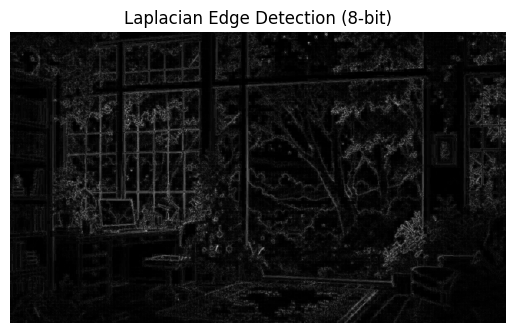

In [ ]:
matplotlib_imshow('Original Image', img)
grey_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

laplacian = cv.Laplacian(grey_img, cv.CV_64F)
# matplotlib_imshow('Laplacian Edge Detection', laplacian)

laplacian_abs = cv.convertScaleAbs(laplacian)
matplotlib_imshow('Laplacian Edge Detection (8-bit)', laplacian_abs)

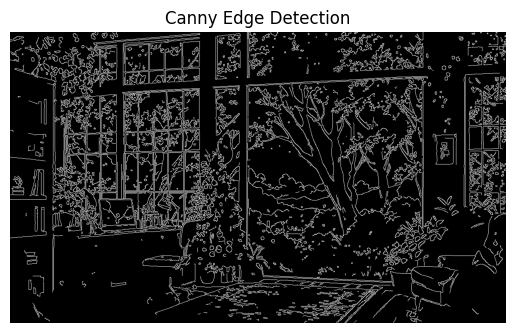

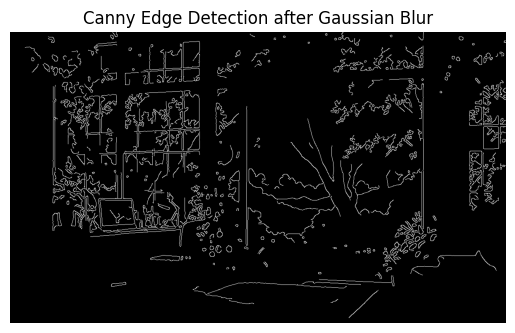

In [32]:
## Canny edge detection
canny_edges = cv.Canny(grey_img, 100, 200)
matplotlib_imshow('Canny Edge Detection', canny_edges)  

blur_temp = cv.GaussianBlur(grey_img, (5, 5), 1.6)
edges = cv.Canny(blur_temp, 100, 200)
matplotlib_imshow('Canny Edge Detection after Gaussian Blur', edges)

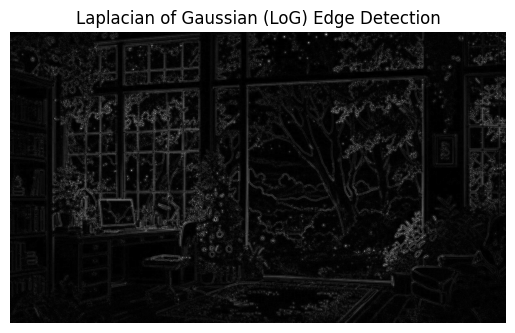

In [28]:
## Lapplacian of Gaussian (LoG) Edge Detection
blurred_img = cv.GaussianBlur(grey_img, (5, 5), 0)
log_edges = cv.Laplacian(blurred_img, cv.CV_64F)
log_edges_abs = cv.convertScaleAbs(log_edges)
matplotlib_imshow('Laplacian of Gaussian (LoG) Edge Detection', log_edges_abs)

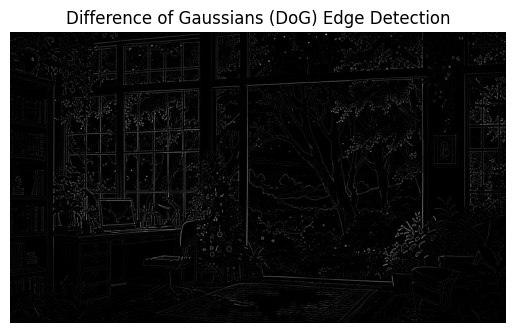

In [ ]:
## Difference of Gaussians (DoG) Edge Detection
blurred_img1 = cv.GaussianBlur(grey_img, (5, 5), 1)
blurred_img2 = cv.GaussianBlur(grey_img, (5, 5), 10)
dog_edges = cv.subtract(blurred_img1, blurred_img2)
matplotlib_imshow('Difference of Gaussians (DoG) Edge Detection', dog_edges)